In [1]:
# ---- Library import ----

import pickle
from time import gmtime, strftime
import math

from sklearn.metrics import balanced_accuracy_score
import albumentations
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import torchy

In [2]:
# ---- My utils ----
import sys
sys.path.insert( 0, '../..' ) # To be able to access to utils
from utils.train_arguments import *
from utils.utils_data import *
from utils.utils_training import *

usage: ipykernel_launcher.py [-h] [--verbose] [--epochs EPOCHS]
                             [--batch_size BATCH_SIZE]
                             [--model_name {efficientnet}]
                             [--optimizer {adam,sgd,rmsprop}]
                             [--balanced_sampler]
                             [--depth_coefficient DEPTH_COEFFICIENT]
                             [--width_coefficient WIDTH_COEFFICIENT]
                             [--resolution_coefficient RESOLUTION_COEFFICIENT]
                             [--compound_coefficient COMPOUND_COEFFICIENT]
                             [--learning_rate LEARNING_RATE]
                             [--data_augmentation] [--img_size IMG_SIZE]
                             [--crop_size CROP_SIZE] [--output_dir OUTPUT_DIR]
                             [--path_extension PATH_EXTENSION]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/1004/jupyter/kernel-80ccc669-cc1a-4678-825d-d5a7657f69ed.json


Working with Jupyter notebook! (Default Arguments)
results/new_logs_efficientnet_adam/


In [3]:
SEED = 2

## Without DA

In [4]:
args.crop_size = math.ceil(args.crop_size * args.resolution_coefficient)
args.img_size = math.ceil(args.img_size * args.resolution_coefficient)

train_aug = albumentations.Compose([
    albumentations.PadIfNeeded(p=1, min_height=args.crop_size, min_width=args.crop_size),
    albumentations.Resize(args.img_size, args.img_size),
    albumentations.RandomCrop(p=1, height=args.crop_size, width=args.crop_size)
])

In [5]:
train_dataset = ISIC2019_FromFolders(data_partition="train", albumentation=train_aug)

#if args.balanced_sampler:
torch.manual_seed(SEED)
sampler_weights = get_sampler_weights()
assert len(sampler_weights)==len(train_dataset), "Weights for data balancing not correspond to dataset"
sampler = torch.utils.data.sampler.WeightedRandomSampler(sampler_weights, len(sampler_weights))
train_loader = DataLoader(train_dataset, pin_memory=True, shuffle=False, sampler=sampler, batch_size=args.batch_size)

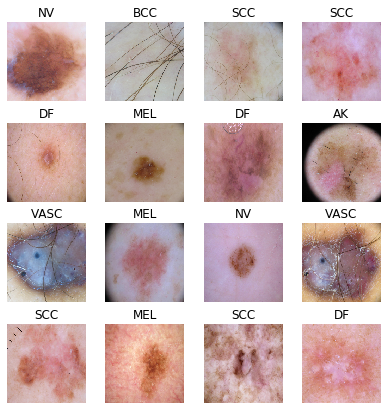

In [6]:
images, labels = next(iter(train_loader))
save_imgs(images, labels, display=True, save=False, custom_name="train_samples_withoutDA")

## Custom DA

In [31]:
args.crop_size = math.ceil(args.crop_size * args.resolution_coefficient)
args.img_size = math.ceil(args.img_size * args.resolution_coefficient)

train_aug = albumentations.Compose([
    albumentations.PadIfNeeded(p=1, min_height=args.crop_size, min_width=args.crop_size),
    albumentations.Resize(args.img_size, args.img_size),
    albumentations.RandomCrop(p=1, height=args.crop_size, width=args.crop_size),
    albumentations.VerticalFlip(),
    albumentations.HorizontalFlip(),
    albumentations.RandomBrightnessContrast(p=0.5, brightness_limit=0.22, contrast_limit=0.22),
    albumentations.HueSaturationValue(p=0.5, hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=5),
    albumentations.ShiftScaleRotate(p=0.5, shift_limit=0.1, scale_limit=0.1, rotate_limit=45)
])

train_transforms = transforms.Compose([
    transforms.ToTensor(),
])

In [32]:
train_dataset = ISIC2019_FromFolders(data_partition="train", albumentation=train_aug, transforms=train_transforms)

#if args.balanced_sampler:
torch.manual_seed(SEED)
sampler_weights = get_sampler_weights()
assert len(sampler_weights)==len(train_dataset), "Weights for data balancing not correspond to dataset"
sampler = torch.utils.data.sampler.WeightedRandomSampler(sampler_weights, len(sampler_weights))
train_loader = DataLoader(train_dataset, pin_memory=True, shuffle=False, sampler=sampler, batch_size=args.batch_size)

In [33]:
images, labels = next(iter(train_loader))
save_imgs(images, labels, display=True, save=False, custom_name="train_samples_withoutDA")

TypeError: transpose() takes 2 positional arguments but 3 were given